In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from linear_regression import LinearRegression

df = pd.read_csv('linreg.csv')

X = df.iloc[:,0].values
Y = df.iloc[:,1].values

pd.set_option('display.max_columns', None) # using chatgpt
pd.set_option('display.max_rows', None)
print(df.shape)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_len = int(0.8*len(df)) # 80-20 division -> 80%-training data 10%-testing data 10%-validation
test_len = int(0.1*len(df))
print(train_len)

df_train = df[:train_len][:]
df_test = df[train_len:test_len+train_len][:]
df_val = df[train_len+test_len:][:]

df_train.to_csv('linreg_train.csv',index=False)
df_test.to_csv('linreg_test.csv',index=False)
df_val.to_csv('linreg_validate.csv',index=False)

x_train = df_train.iloc[:, 0].values
y_train = df_train.iloc[:, 1].values

x_val = df_val.iloc[:, 0].values
y_val = df_val.iloc[:, 1].values

x_test = df_test.iloc[:, 0].values
y_test = df_test.iloc[:, 1].values


(400, 2)
320


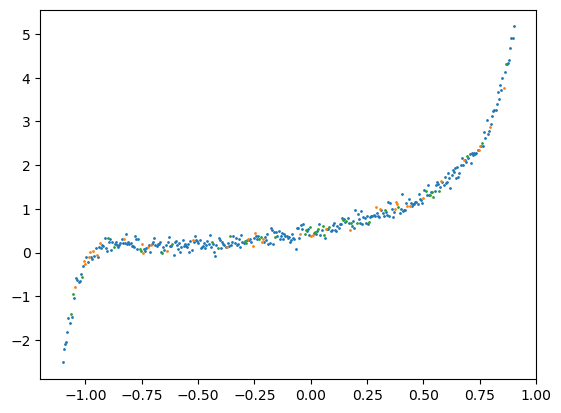

In [2]:
plt.scatter(x_train, y_train,s=1)
plt.scatter(x_val, y_val,s=1)
plt.scatter(x_test, y_test,s=1)
plt.show()

[0.64960079 0.44564728 0.13367929 0.877289  ]
The mean square error on training set in case of Degree 1 is: 0.12311936489652027
The standard deviation on training set in case of Degree 1 is: 0.35077303818992694
The variance on training set in case of Degree 1 is: 0.12304172432099195


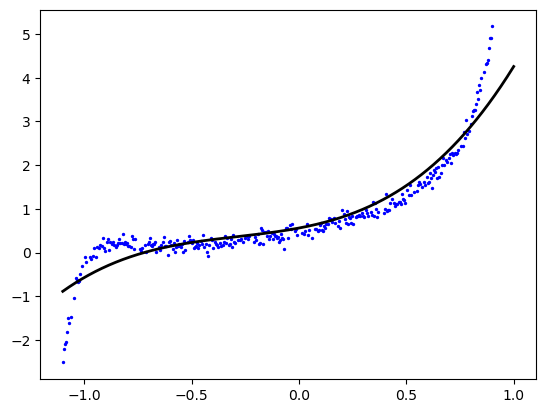

The mean square error on validation set in case of Degree 1 is: 0.07056227634113643
The standard deviation on validation set in case of Degree 1 is: 0.2629203125691378
The variance on validation set in case of Degree 1 is: 0.06912709076145311


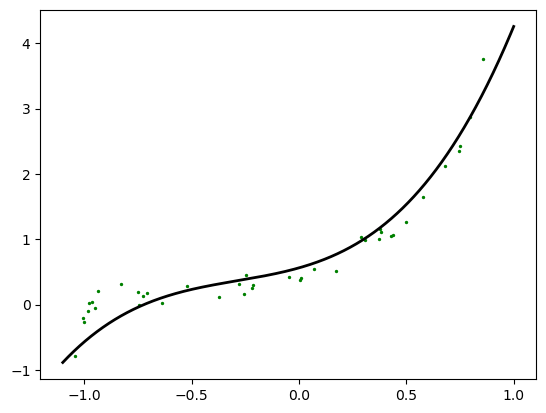

The mean square error on test set in case of Degree 1 is: 0.07320676555877675
The standard deviation on test set in case of Degree 1 is: 0.26492435059120323
The variance on test set in case of Degree 1 is: 0.07018491153617076


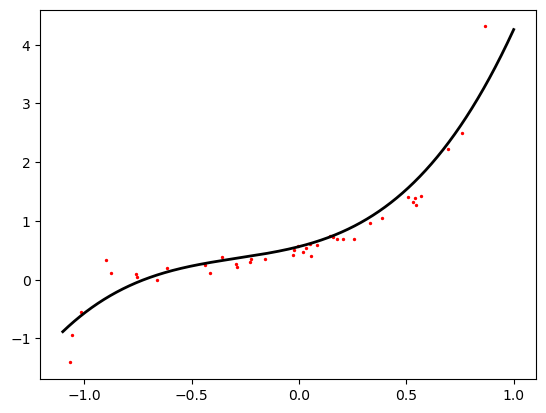

In [3]:
# training set
k=3
regressor = LinearRegression()
regressor.fit(x_train,y_train,k)

Inp = [i * 0.001 for i in range(-1100, 1001)]
regression_line = regressor.predict(Inp,k)

y_predicted_train = regressor.predict(x_train,k)
mse_train = regressor.MSE(y_train,y_predicted_train)
std_dev_train = regressor.std_deviation(y_train,y_predicted_train)
var_train = regressor.variance(y_train,y_predicted_train)
print(f'The mean square error on training set in case of Degree 1 is: {mse_train}')
print(f'The standard deviation on training set in case of Degree 1 is: {std_dev_train}')
print(f'The variance on training set in case of Degree 1 is: {var_train}')

plt.scatter(x_train, y_train, color='b', label='Train Data',s=2)
plt.plot(Inp,regression_line,color='black',linewidth=2)
plt.show()


# validation set
best_l_rate = 0.01
best_iterations = 10000
y_predicted_val = regressor.predict(x_val,k)
mse_val = regressor.MSE(y_val,y_predicted_val)
std_dev_val = regressor.std_deviation(y_val,y_predicted_val)
var_val = regressor.variance(y_val,y_predicted_val)
print(f'The mean square error on validation set in case of Degree 1 is: {mse_val}')
print(f'The standard deviation on validation set in case of Degree 1 is: {std_dev_val}')
print(f'The variance on validation set in case of Degree 1 is: {var_val}')

plt.scatter(x_val, y_val, color='g', label='Validation Data',s=2)
plt.plot(Inp,regression_line,color='black',linewidth=2)
plt.show()


# test set
y_predicted = regressor.predict(x_test,k)
mse = regressor.MSE(y_test,y_predicted)
std_dev = regressor.std_deviation(y_test,y_predicted)
var = regressor.variance(y_test,y_predicted)
print(f'The mean square error on test set in case of Degree 1 is: {mse}')
print(f'The standard deviation on test set in case of Degree 1 is: {std_dev}')
print(f'The variance on test set in case of Degree 1 is: {var}')

plt.scatter(x_test, y_test, color='r', label='Test Data',s=2)
plt.plot(Inp,regression_line,color='black',linewidth=2)
plt.show()